# Preliminary Data Analysis for Mushroom Dataset

In this notebook, we will conduct a preliminary analysis of the mushroom dataset. The goal is to explore the data, understand the features, check for any missing values, and analyze the distribution of the data. Specifically, we will address the following questions:

1. Are there any missing values in the dataset?
2. What is the proportion of edible mushrooms to poisonous ones?
3. What values do the features take? Which feature values appear most frequently?
4. Which features are particularly important for classification?
5. What features distinguish poisonous mushrooms from edible ones?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
feature_full_names = {
    'class': {'p': 'poisonous', 'e': 'edible'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}


In [3]:
df = pd.read_csv("archive/mushrooms.csv")
for column in df.columns:
    if column in feature_full_names:
        df[column] = df[column].map(feature_full_names[column]).fillna(df[column])

## Step 1: Check for missing values
First, let's check if there are any missing values in the dataset.

In [4]:
missing_values = {column: (df[column] == 'missing').sum() for column in df.columns}

for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count}")

stalk-root: 2480


Yes, there are missing values in the dataset. Specifically, the "stalk-root" column has 2480 missing values.

## Step 2: Proportion of edible vs poisonous mushrooms
Next, let's explore the proportion of edible (e) and poisonous (p) mushrooms in the dataset

In [5]:
class_counts = df['class'].value_counts()
class_proportions = df['class'].value_counts(normalize=True)

class_summary = pd.DataFrame({
    'Class': class_counts.index,
    'Count': class_counts.values,
    'Proportion': class_proportions.values
})

class_summary.index = range(1, len(class_summary) + 1)
class_summary

,Class,Count,Proportion
1,edible,4208,0.517971
2,poisonous,3916,0.482029


Additionally, we can visualize this distribution using a bar plot:

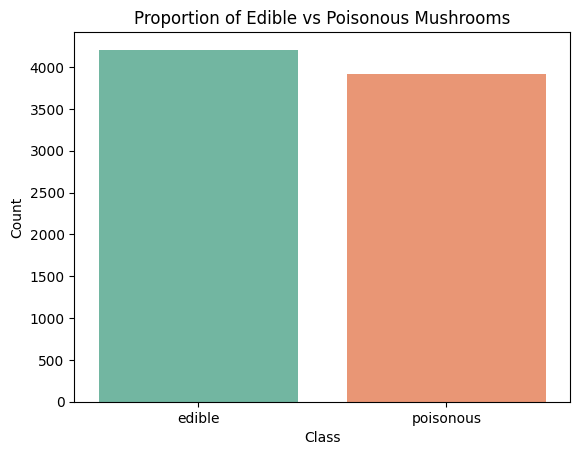

In [6]:
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2', hue=class_counts.index, dodge=False, legend=False)
plt.title("Proportion of Edible vs Poisonous Mushrooms")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Step 3: Analyzing Feature Values and Frequencies
In this step, we will identify the unique values for each feature and visualize the distribution of values for each feature in the dataset

In [8]:
full_feature_values = {}

for column in df.columns:
    unique_values = df[column].unique() 
    full_feature_values[column] = unique_values

full_values_df = pd.DataFrame(list(full_feature_values.items()), columns=['Feature', 'Full Unique Values'])
full_values_df.index = range(1, len(full_values_df) + 1)
full_values_df


,Feature,Full Unique Values
1,class,"[poisonous, edible]"
2,cap-shape,"[convex, bell, sunken, flat, knobbed, conical]"
3,cap-surface,"[smooth, scaly, fibrous, grooves]"
4,cap-color,"[brown, yellow, white, gray, red, pink, buff, ..."
5,bruises,"[bruises, no bruises]"
6,odor,"[pungent, almond, anise, none, foul, creosote,..."
7,gill-attachment,"[free, attached]"
8,gill-spacing,"[close, crowded]"
9,gill-size,"[narrow, broad]"
10,gill-color,"[black, brown, gray, pink, white, chocolate, p..."


This will give an overview of which unique values each feature has.

Next, we will visualize the distribution of values for each feature in the dataset (except for the "class" column, as it has already been analyzed in step 2). 

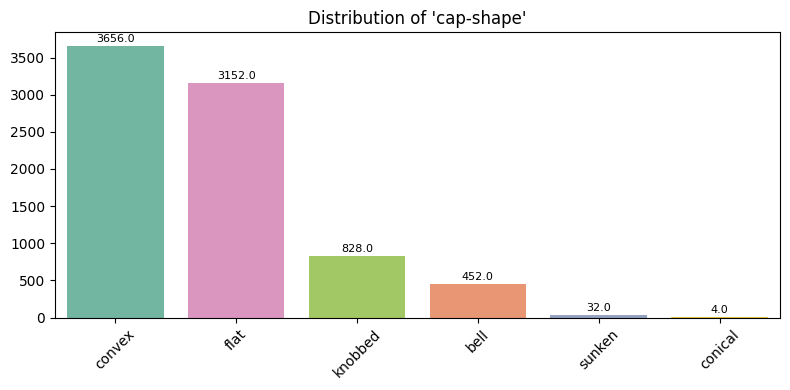

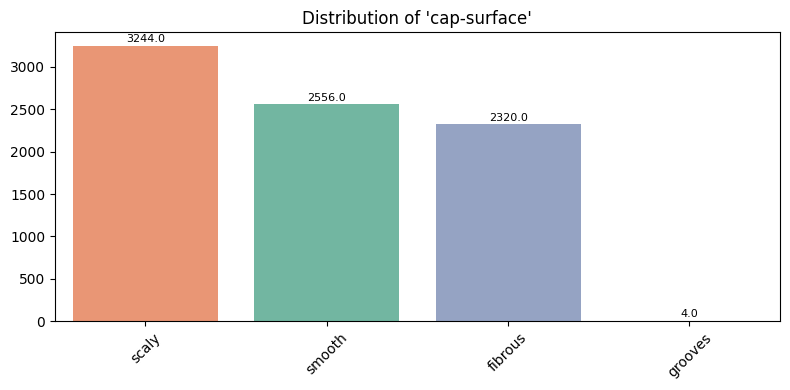

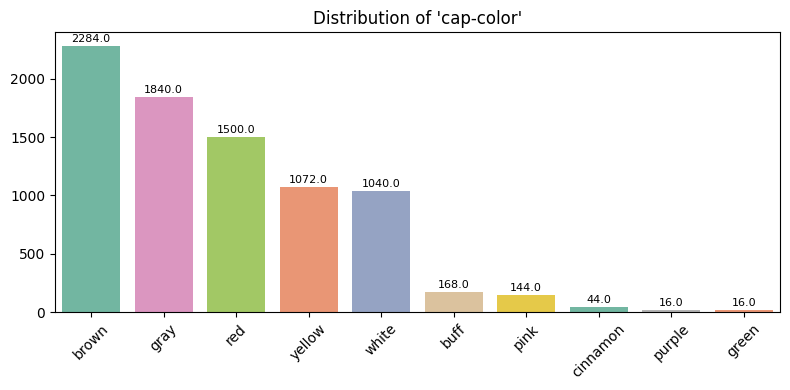

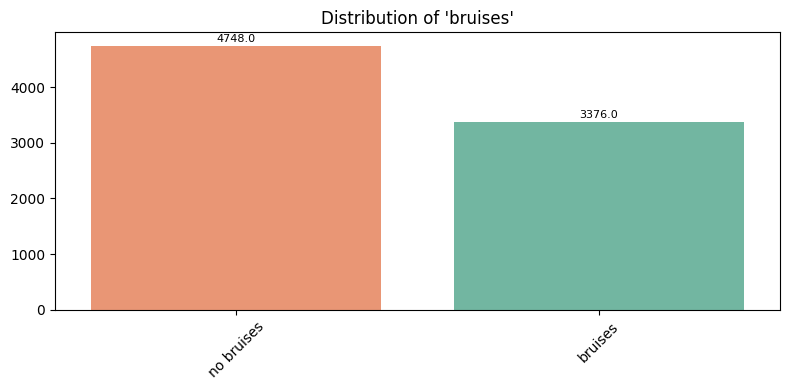

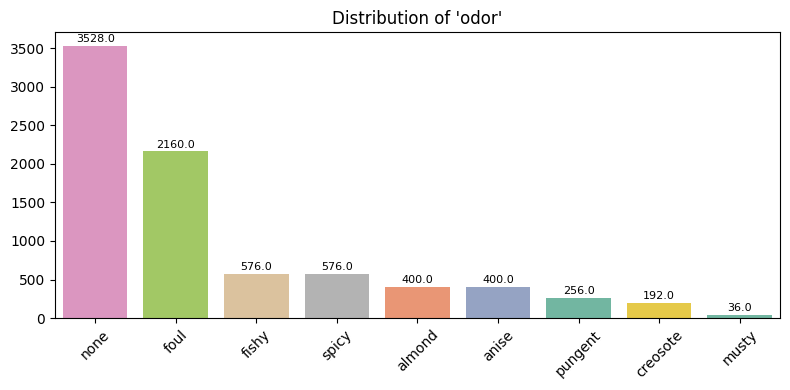

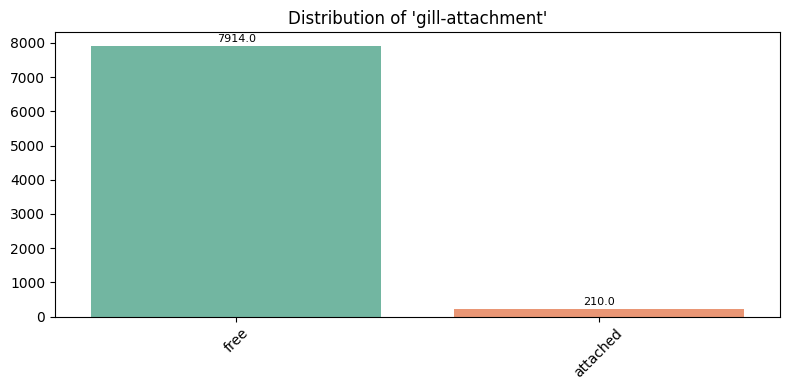

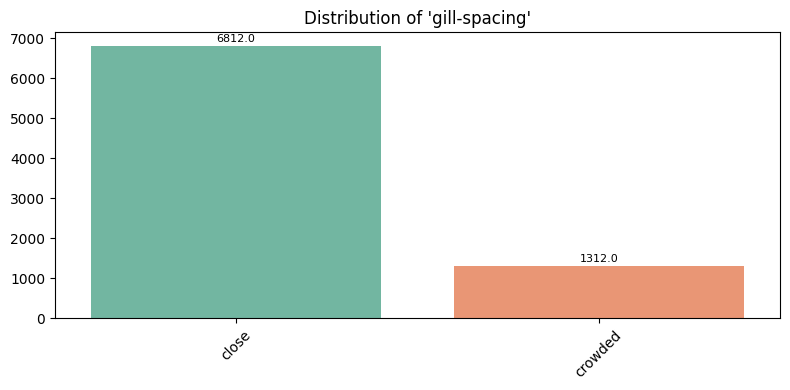

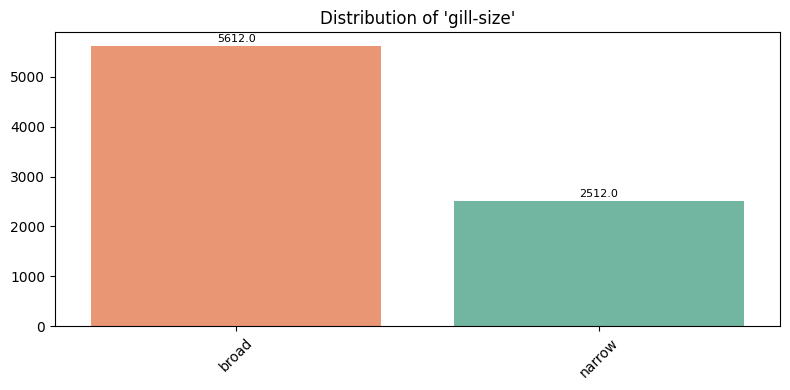

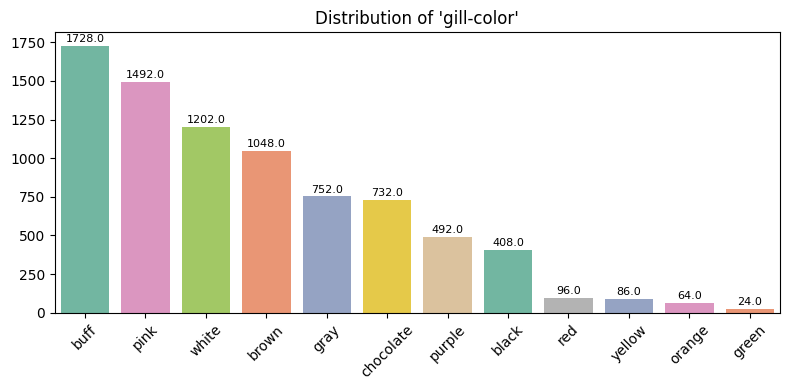

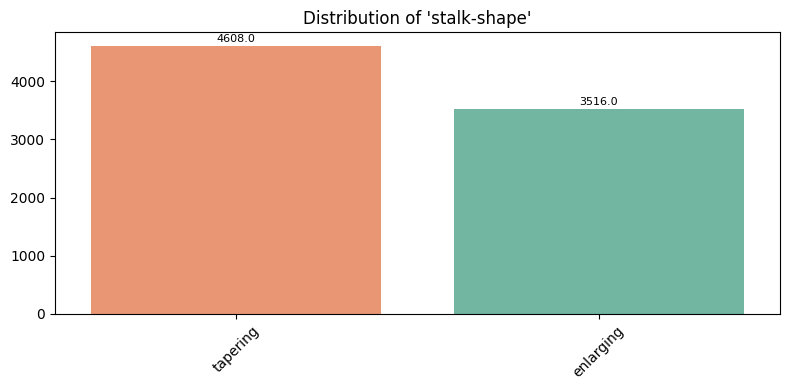

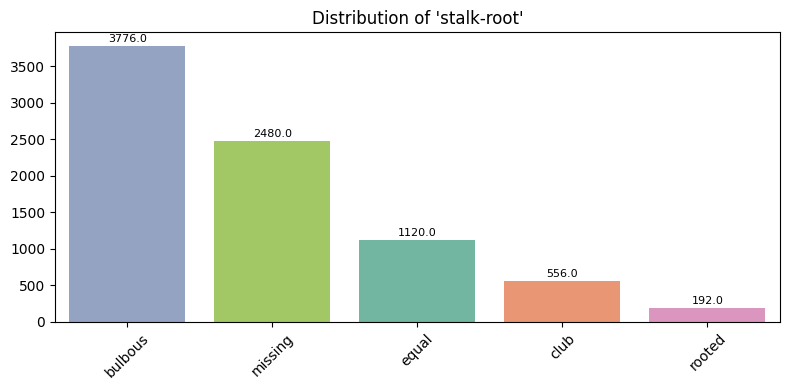

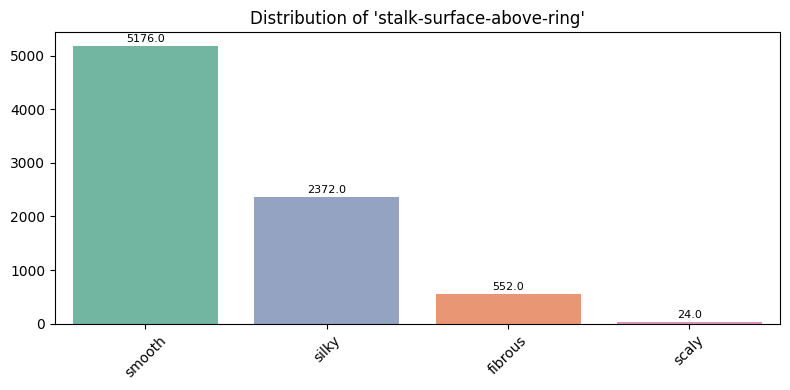

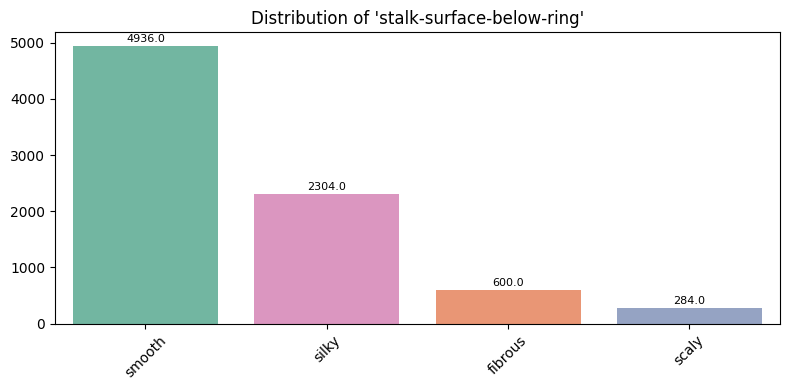

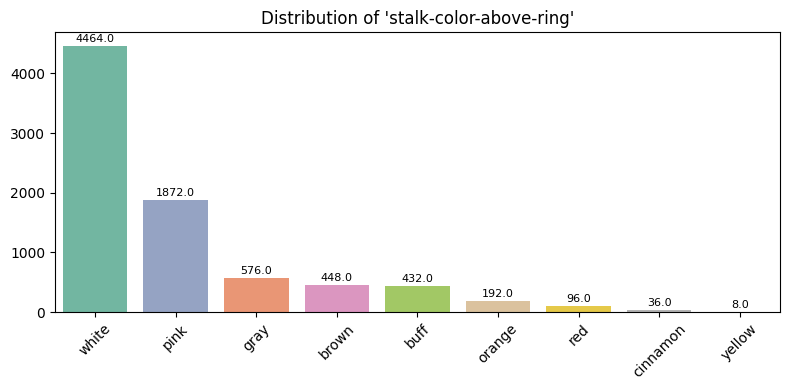

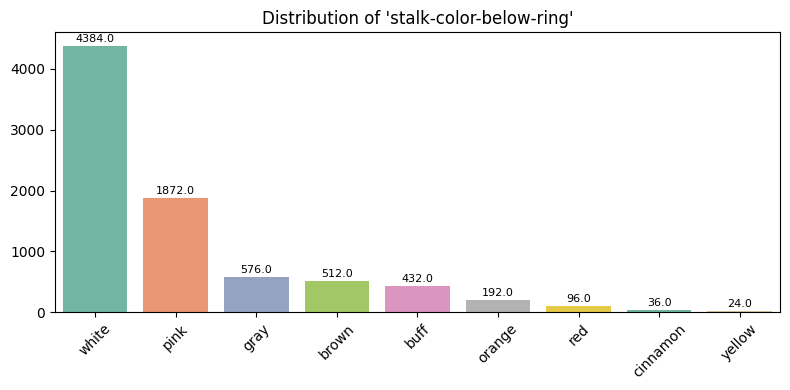

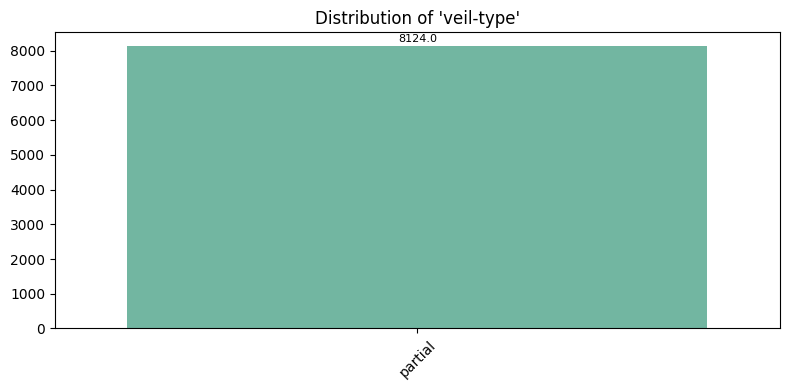

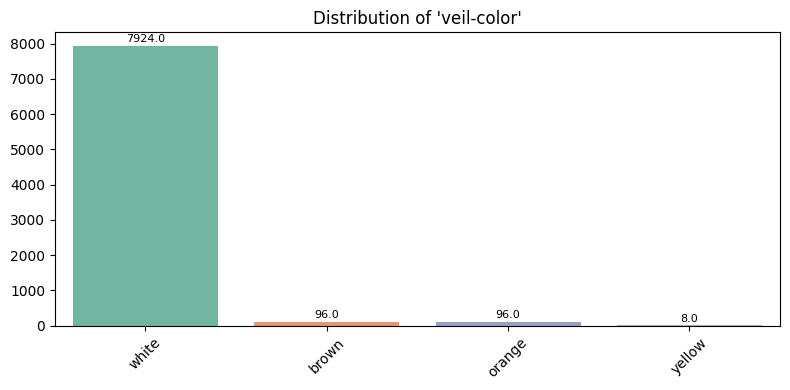

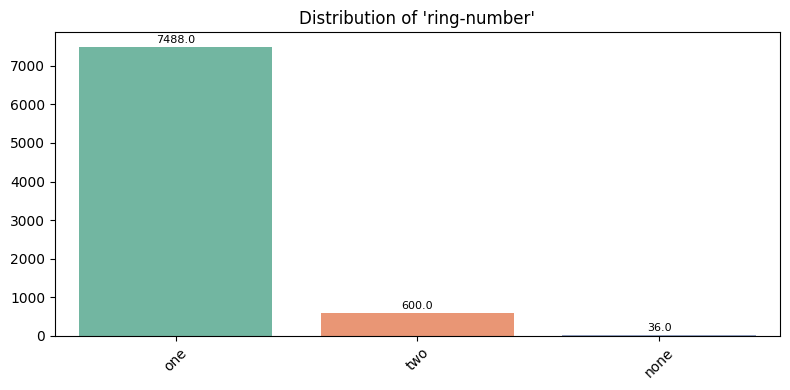

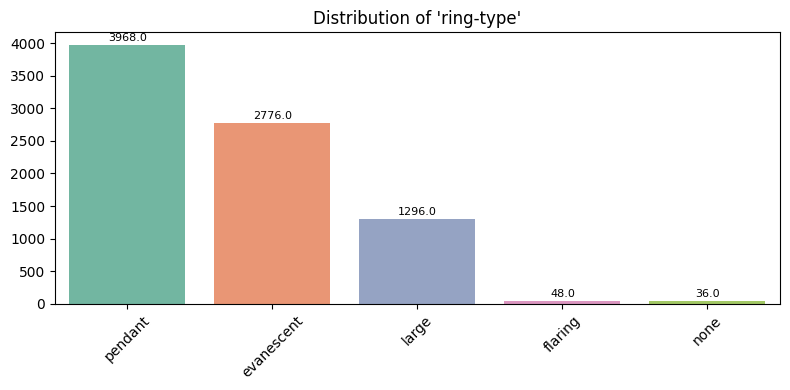

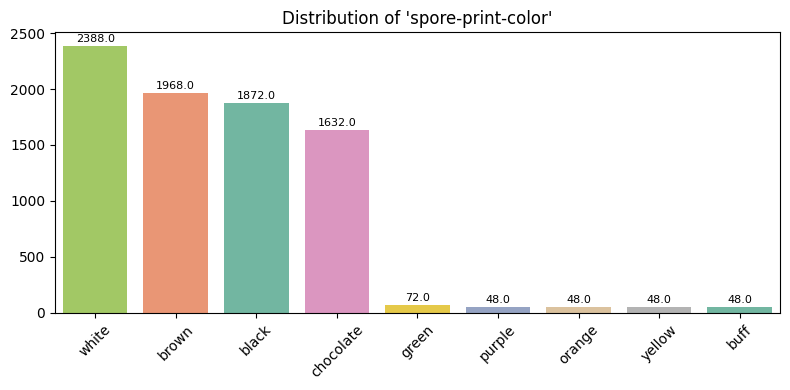

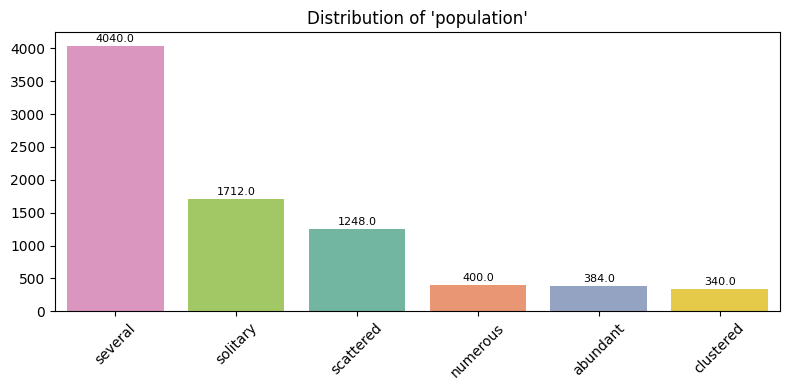

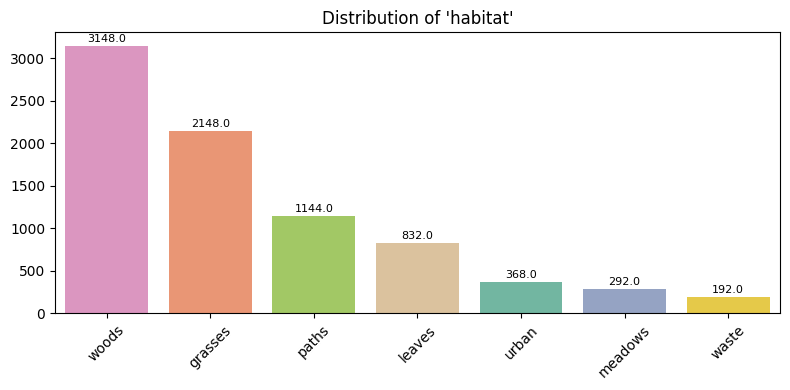

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    if column == 'class':
        continue 

    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df,
        x=df[column],
        hue=column,
        order=df[column].value_counts().index,
        palette="Set2"
    )
    
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=8, 
            xytext=(0, 5), textcoords='offset points'
        )

    plt.title(f"Distribution of '{column}'")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)
    plt.tight_layout()
    plt.show()


In [10]:
summary = {}
for column in df.columns:
    most_common = df[column].value_counts().idxmax()
    count = df[column].value_counts().max()
    
    if column in feature_full_names:
        most_common_full = feature_full_names[column].get(most_common, most_common)
    else:
        most_common_full = most_common
    
    summary[column] = {"Most Frequent Value": most_common_full, "Count": count}

pd.DataFrame(summary).T


,Most Frequent Value,Count
class,edible,4208
cap-shape,convex,3656
cap-surface,scaly,3244
cap-color,brown,2284
bruises,no bruises,4748
odor,none,3528
gill-attachment,free,7914
gill-spacing,close,6812
gill-size,broad,5612
gill-color,buff,1728


## Step 4. Distribution of Feature Values by Class
In this step, we visualize the distribution of different feature values across various classes.

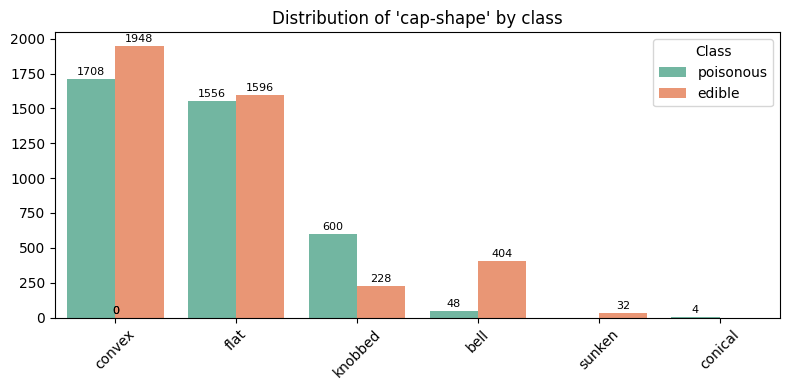

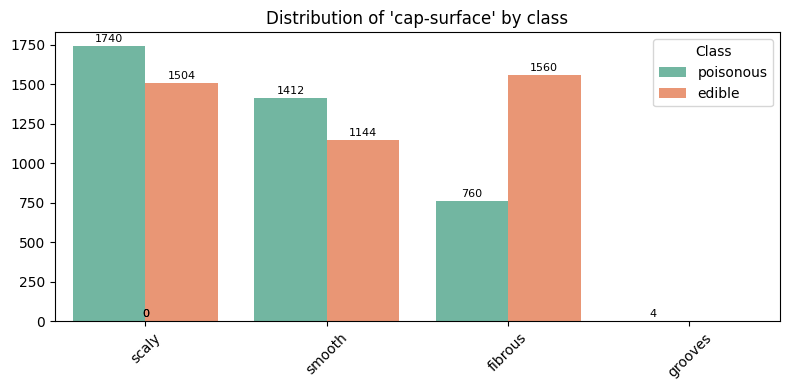

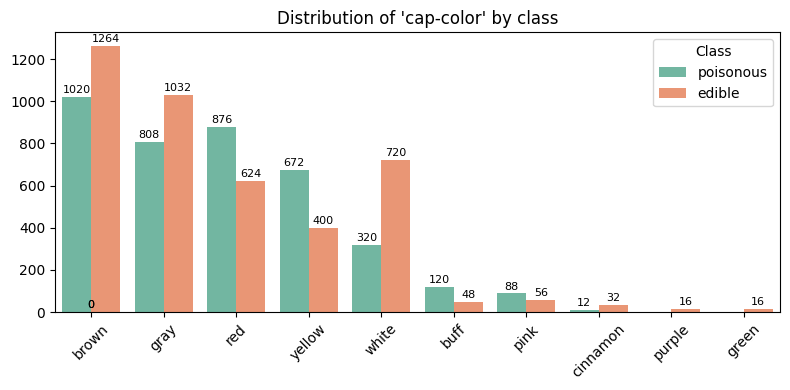

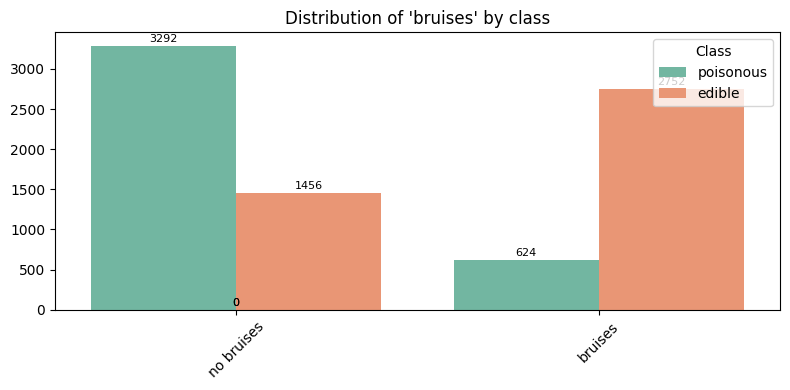

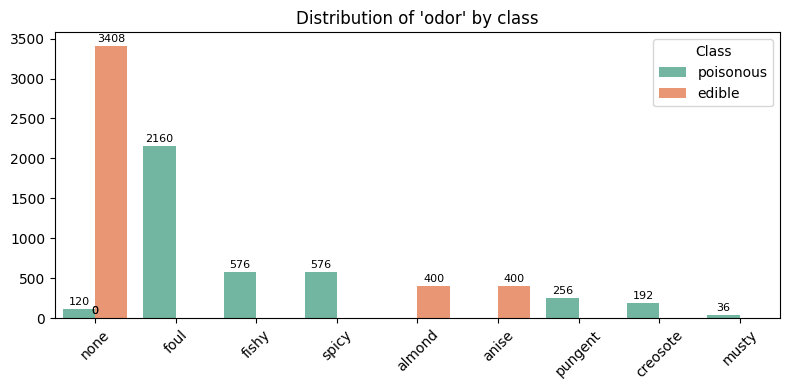

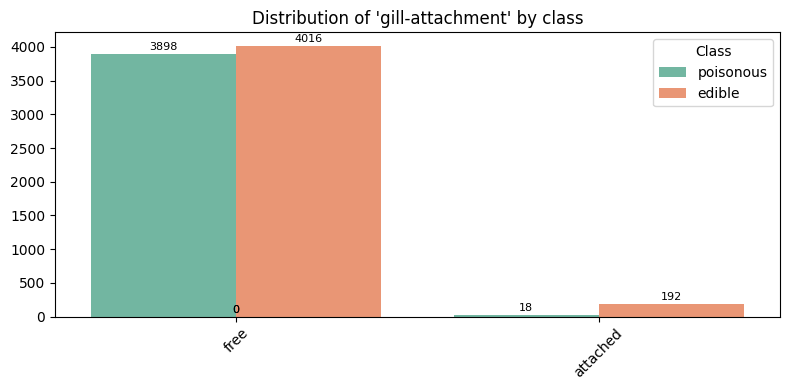

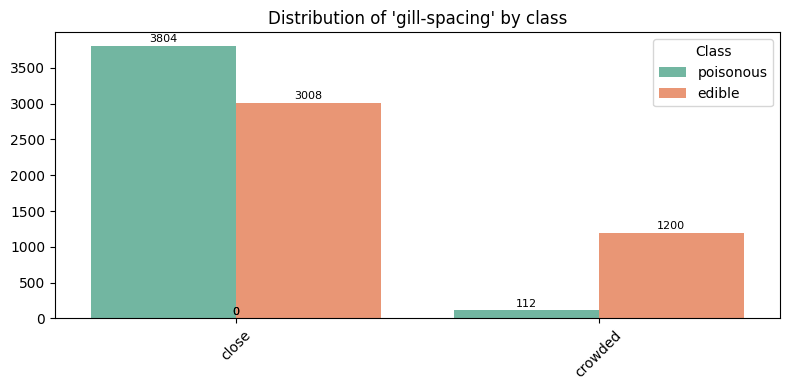

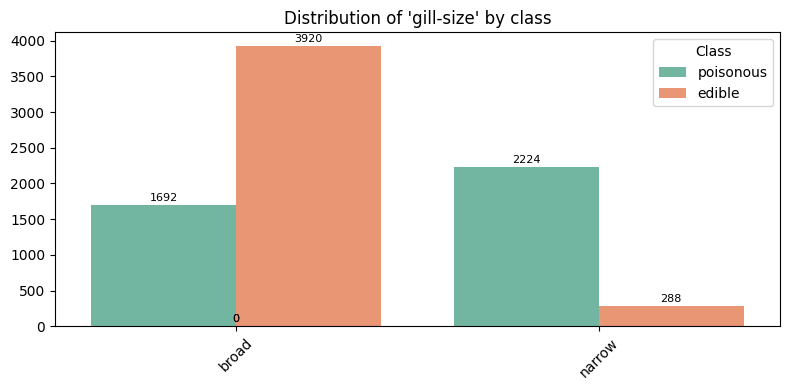

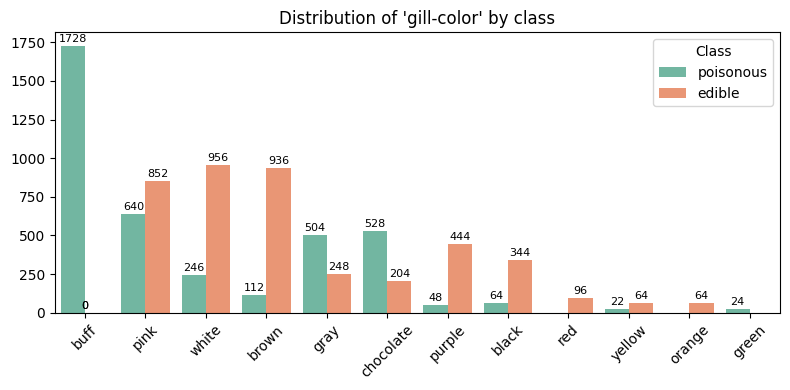

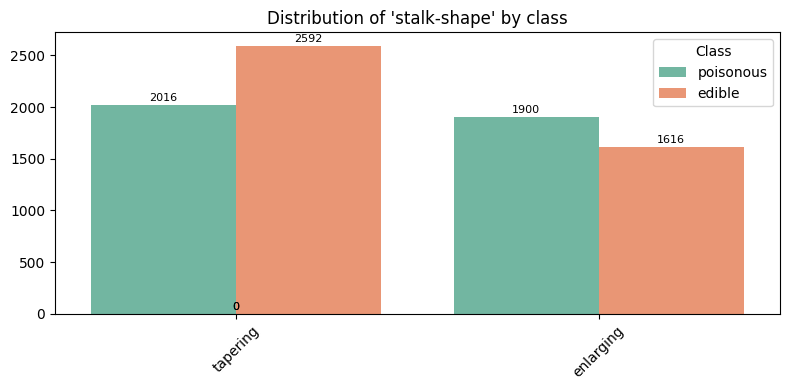

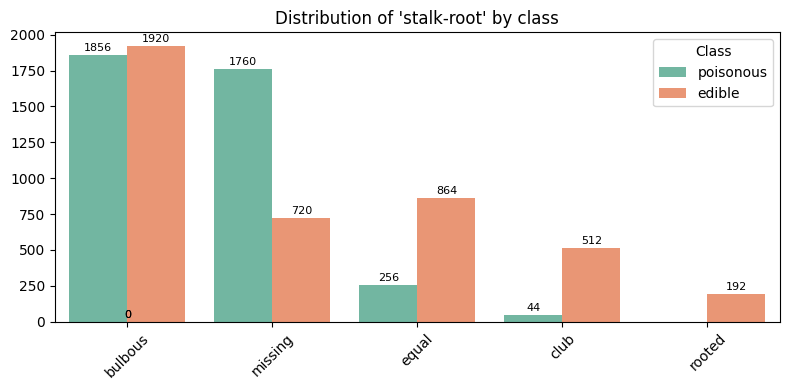

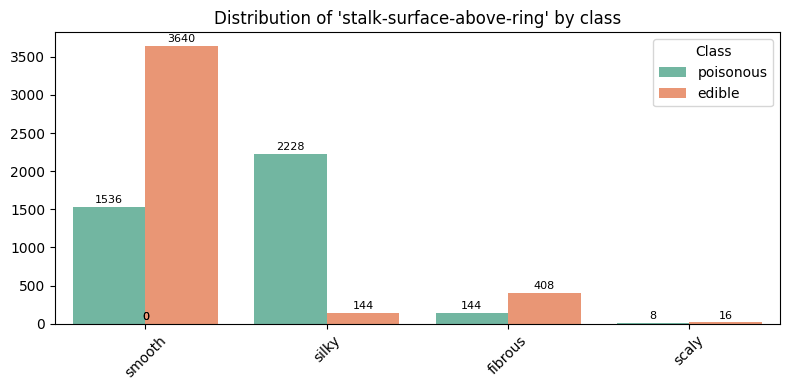

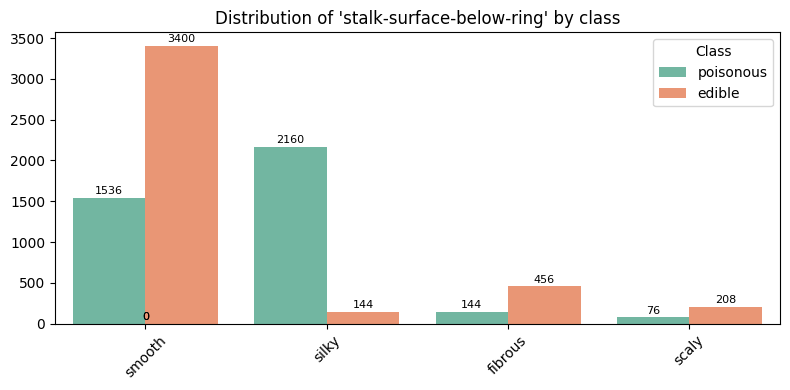

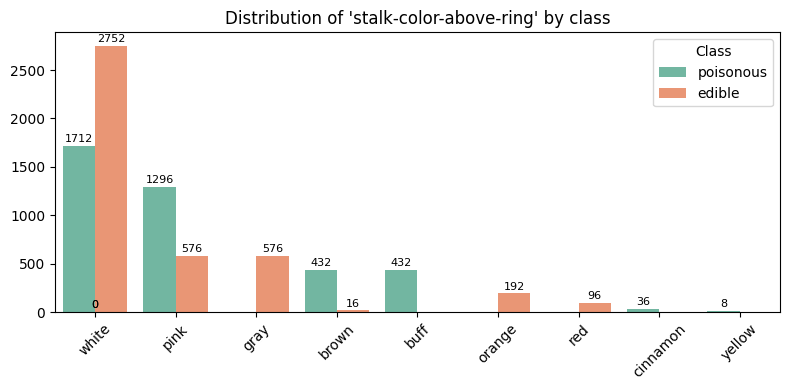

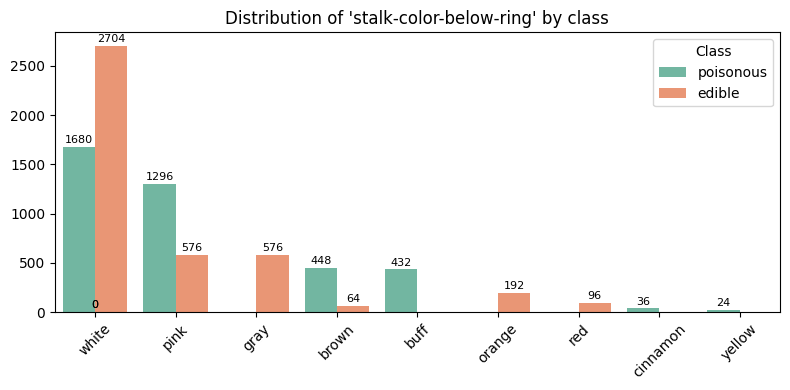

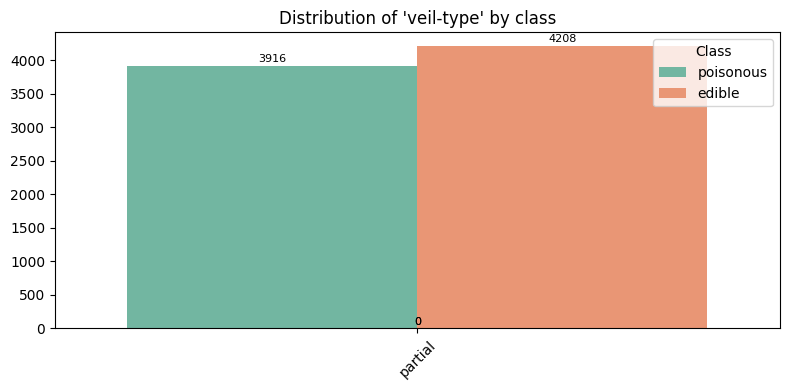

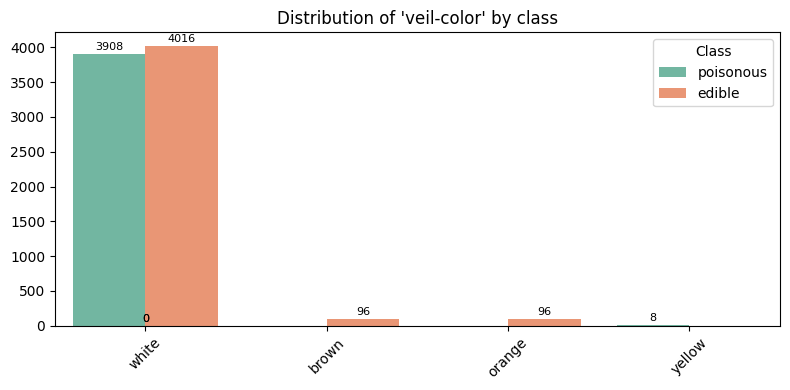

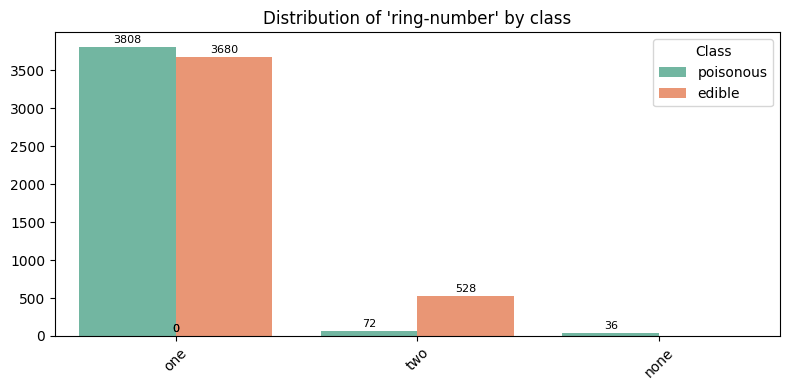

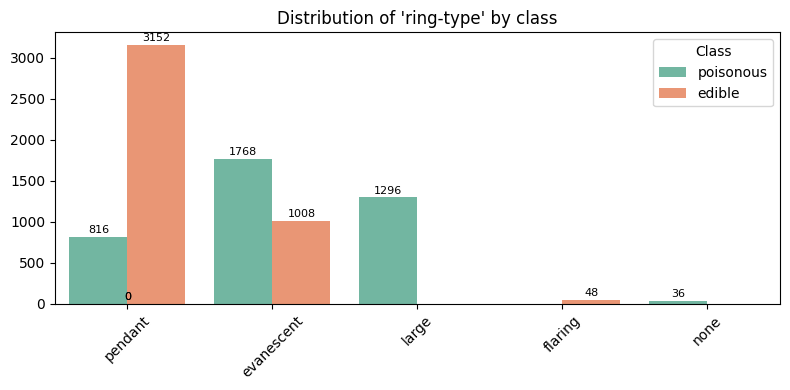

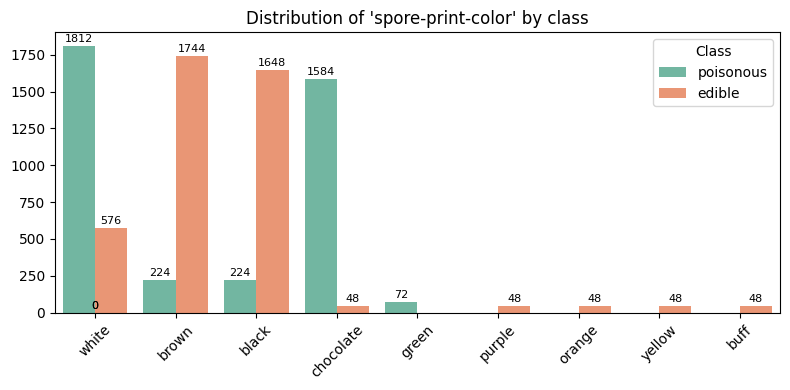

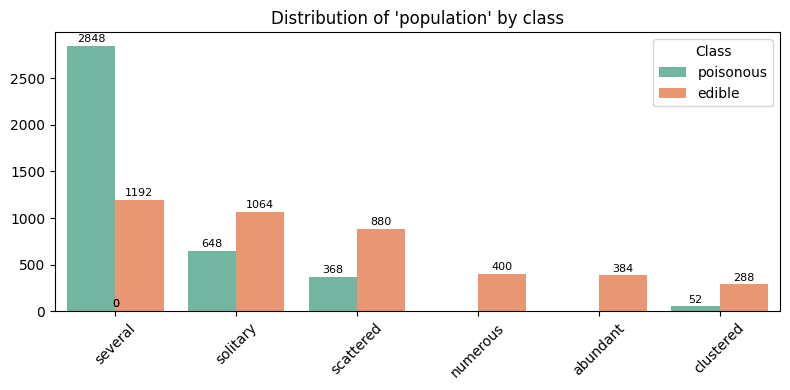

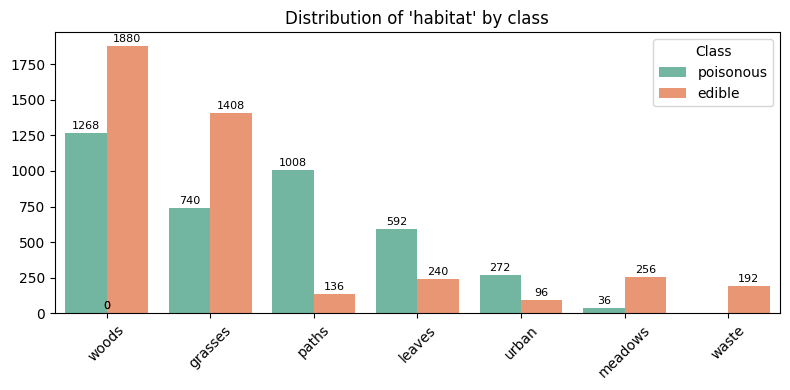

In [19]:
for column in df.columns:
    if column != 'class':
        
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(data=df, x=df[column], hue=df['class'], order=df[column].value_counts().index, palette="Set2")
        
        plt.title(f"Distribution of '{column}' by class")
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(rotation=45)
        plt.legend(title='Class', loc='upper right')
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=8,
                        xytext=(0, 5), textcoords='offset points')
        
        plt.show()


### Analysis of the Mushroom Dataset
Based on the output of the feature distributions, we can make several observations about the dataset:

1. **Cap Shape:**
The most common cap shapes for edible mushrooms are convex, flat, and bell. For poisonous mushrooms, convex, flat, and knobbed are frequent, though sunken is rare (appearing in only 32 cases) and is found exclusively in edible mushrooms. Conical shapes are extremely rare, appearing only in poisonous mushrooms.

2. **Cap Surface:**
The dominant surface types for both edible and poisonous mushrooms are scaly, smooth and fibrous. Grooves are exclusively found in poisonous mushrooms, appearing in only 4 cases. Fibrous surfaces, are much more popular for edible mushrooms.

3. **Cap Color:**
For edible mushrooms, the most common cap colors are brown, gray, red, white, and yellow. These colors also occur frequently in poisonous mushrooms. However, buff and pink are less common and mostly associated with poisonous mushrooms. Cinnamon, purple, and green are extremely rare and are mostly found in edible mushrooms.

4. **Bruises:**
Edible mushrooms tend to have bruises (2752 cases), whereas poisonous mushrooms rarely show bruises (624 cases). This pattern is also reflected in the "no bruises" category, where poisonous mushrooms have a significantly higher count of mushrooms with no bruising.

5. **Odor:**
Edible mushrooms tend to have mild, pleasant odors such as almond, anise, or no odor at all. In contrast, poisonous mushrooms tend to have more offensive odors such as foul, fishy, pungent, creosote, or musty.

6. **Gill Attachment:**
The majority of mushrooms in both categories have free gills. Attached gills are much less common and are primarily found in edible mushrooms.

7. **Gill Spacing:**
Close gill spacing is common in both edible and poisonous mushrooms, but it is more prevalent in poisonous mushrooms. Crowded gill spacing is found more frequently in edible mushrooms, while it is very rare in poisonous mushrooms.

8. **Gill Size:**
Edible mushrooms typically have broad gills, although poisonous mushrooms also exhibit a high count of broad gills. Narrow gills, however, are predominantly found in poisonous mushrooms.

9. **Gill Color:**
Edible mushrooms generally have pink, white, brown, purple, or black gills. In contrast, poisonous mushrooms often have chocolate, buff, or gray gills, with pink being common as well. Red, yellow, and orange gills are rare and mostly associated with edible mushrooms. Green gills are also rare and mostly found in poisonous mushrooms.

10. **Stalk Shape:**
Both edible and poisonous mushrooms commonly exhibit tapering and enlarging stalk shapes. Tapering is slightly more common in edible mushrooms, while enlarging is more frequent in poisonous mushrooms.

11. **Stalk Root:**
Edible mushrooms typically have stalk roots across all categories, with bulbous being the most common. Poisonous mushrooms mostly have bulbous stalk roots. It is worth noting that there is a significant amount of **missing information** regarding stalk roots, particularly for poisonous mushrooms.

12. **Stalk Surface Above Ring:**
The most common stalk surface above the ring for edible mushrooms is smooth. Poisonous mushrooms, on the other hand, predominantly feature a silky surface, with smooth being the second most frequent. Fibrous and scaly surfaces are rare for both categories, though they are slightly more common in edible mushrooms.

13. **Stalk Surface Below Ring:**
For edible mushrooms, smooth is the most prevalent surface type below the ring, with fibrous being relatively common as well. Scaly and silky surfaces are less frequent. In poisonous mushrooms, silky and smooth are the dominant surface types, while fibrous is less common and scaly is quite rare.

14. **Stalk Color Above Ring:**
Edible mushrooms are most commonly found with white stalks above the ring, followed by pink and gray. Orange and red stalk colors are exclusive to edible mushrooms but are very rare. Edible mushrooms do not have buff, cinnamon, or yellow stalks above the ring. Poisonous mushrooms predominantly exhibit white and pink stalk colors, with brown and buff appearing occasionally. Cinnamon and yellow are extremely rare, while gray, orange, and red are absent in poisonous mushrooms.

15. **Stalk Color Below Ring:**
The distribution of stalk colors below the ring is nearly identical to that above the ring.

16. **Veil Type:**
Both edible and poisonous mushrooms predominantly have partial veils, with no notable differences in frequency. While the dataset describes a "universal" veil type, it does not appear in the data.

17. **Veil Color:**
White is the most common veil color for both edible and poisonous mushrooms, followed by brown and orange. Brown and orange veils are found exclusively in edible mushrooms, while yellow veils occur only in poisonous mushrooms. Other veil colors are extremely rare.

18. **Ring Number:**
Both edible and poisonous mushrooms predominantly have one ring. Two rings are uncommon, particularly in poisonous mushrooms. Mushrooms without rings are rare and occur only in poisonous varieties.

19. **Ring Type:**
The most common ring type in edible mushrooms is pendant, followed by evanescent. Flaring rings are rarely observed. For poisonous mushrooms, pendant and evanescent are the most frequent ring types, with large rings appearing occasionally. Mushrooms without rings are extremely rare in poisonous varieties..

20. **Spore Print Color:**
In edible mushrooms, brown and black spore print colors are the most frequent, with white being slightly less common. Rare colors such as chocolate, purple, orange, yellow, and buff also occur. Green spore prints are absent in edible mushrooms. Poisonous mushrooms most commonly have white or chocolate spore prints. Brown and black are less frequent, while green is exceedingly rare.

21. **Population:**
Edible mushrooms are well-represented across all population categories. Poisonous mushrooms, however, are most commonly found in the "several" category. They are also present in the "solitary" and "scattered" categories, while "clustered" occurrences are quite rare.

22. **Habitat:**
Edible mushrooms are predominantly found in woods and grassy areas, with meadows and leaves being less common habitats. Paths, urban areas, and waste are rare habitats for edible mushrooms. Poisonous mushrooms are most commonly found in woods, paths, and grassy areas, followed by leaves and urban regions.

## Step 5: Key Features that Differentiate Edible from Poisonous Mushrooms

The following features distinguish poisonous mushrooms from edible ones, based on the significant differences observed in the dataset:

Bruises: Edible mushrooms are much more likely to have bruises (2752 vs. 624 for poisonous), whereas poisonous mushrooms typically do not exhibit bruising.

Odor: A very strong distinguishing feature. Edible mushrooms often lack any odor (3408 vs. 120 for poisonous), while poisonous mushrooms usually emit a more distinctive, sometimes unpleasant, smell.

Gill Size: Edible mushrooms typically have broad gills (3920 vs. 1692 for poisonous), making this a reliable trait for classification.

Gill color: There is a notable difference in the gill color distribution between poisonous and edible mushrooms, with each value showing a strong distinction in count.

Stalk Surface (Above and Below Ring): The stalk surface of edible mushrooms is generally smooth both above and below the ring. In contrast, the most common value for poisonous mushrooms is "silky".

Stalk Color (Above and Below Ring): This feature can serve as a strong identifier. Certain colors, such as gray, brown, buff, orange, red, cinnamon, and yellow, are found only in either edible or poisonous mushrooms. For the more common colors, such as white and pink, there are also significant differences: white is more prevalent in edible mushrooms (2752 vs. 1712 for poisonous), while pink is more typical for poisonous mushrooms (1296 vs. 576 for edible).

Ring Type: About 75% of edible mushrooms have a pendant ring type. Poisonous mushrooms dominate the "evanescent" category. The "large" ring type, which is very typical for poisonous mushrooms, is absent among edible ones. Additionally, values like "flaring" and "none" are exclusive to one type of mushroom (edible or poisonous).

Spore Print Color: The differences in spore print color are striking. Brown and black spore prints, common in edible mushrooms, are rare in poisonous mushrooms. On the other hand, white and chocolate spore prints are typical of poisonous mushrooms and rare in edible ones. The remaining colors (green, purple, orange, yellow, and buff) are rare for both types but are each represented by only one mushroom type.

Population: The majority of poisonous mushrooms in the dataset fall under the "several" category, whereas edible mushrooms are distributed across various population categories.

Habitat: Habitat values also show a strong distinction between the two types, with significant differences in the frequency of each habitat category for poisonous and edible mushrooms.